In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from skimage import draw
from multiprocessing import Pool, TimeoutError
import pickle

In [2]:
img = cv2.imread('./images/inputs/cat.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('./images/inputs/tiger.jpg')
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [3]:
specify_new_points = False
write_back = False

In [4]:
def specify_points(img):
    fig = plt.figure()
    fig.set_label('Select key matching points in the image')
    plt.axis('off')
    plt.imshow(img[:,:,[2,1,0]])
    H, W, C = img.shape
    clicked = [[0, 0], [0, W-1], [H-1, 0], [H-1, W-1]]
#     result = [1]
    
    def on_mouse_pressed(event, ps):
        x = round(event.xdata)
        y = round(event.ydata)
    #         plt.plot(x, y, 'ro')
        plt.clf()
        plt.imshow(img[:,:,[2,1,0]])
        ps.append([x, y])
        points = np.array(ps)
#         triangulation = Delaunay(points)
#         result[0] = triangulation
#         plt.triplot(points[:,0], points[:,1], triangulation.simplices, c='r')
        triang = tri.Triangulation(points[:,0], points[:,1])
        plt.triplot(triang, c='r')
        plt.plot(points[:,0], points[:,1], 'ro')
        
    fig.canvas.mpl_connect('button_press_event', lambda event: on_mouse_pressed(event, clicked))

    return clicked

In [5]:
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=bool)
    mask[fill_row_coords, fill_col_coords] = True
    return mask

def get_mask(triangle, img):
    ys = triangle[:,1]
    xs = triangle[:,0]
    mask = poly2mask(ys, xs, img.shape[:2])
#     fig = plt.figure()
#     plt.imshow(np.uint8(mask), cmap='gray')
    return mask

In [6]:
if specify_new_points:
    %matplotlib notebook
    points = specify_points(img)
    print("Specify")
else:
    points = pickle.load(open('points.pkl', 'rb'))

In [7]:
if specify_new_points:
    %matplotlib notebook
    points_2 = specify_points(img2)
    print("Specify")
else:
    points_2 = pickle.load(open('points_2.pkl', 'rb'))

In [8]:
if write_back:
    pickle.dump(points, open('points.pkl', 'wb'))
    pickle.dump(points_2, open('points_2.pkl', 'wb'))

In [9]:
points = np.array(points)
points_2 = np.array(points_2)
len(points)==len(points_2)

True

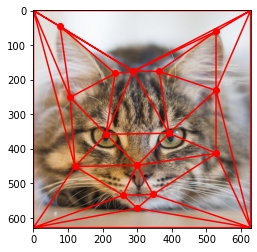

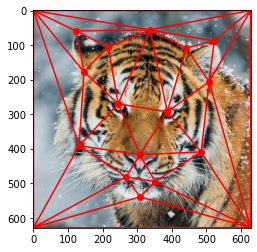

In [10]:
%matplotlib inline
test = tri.Triangulation(points_2[:,0], points_2[:,1]).get_masked_triangles()
fig = plt.figure()
plt.imshow(img[:,:,[2,1,0]])
# triang = tri.Triangulation(points[:,0], points[:,1])
plt.triplot(points[:,0], points[:,1], test, c='r')
plt.plot(points[:,0], points[:,1], 'ro')
fig = plt.figure()
plt.imshow(img2[:,:,[2,1,0]])
# triang = tri.Triangulation(points[:,0], points[:,1])
plt.triplot(points_2[:,0], points_2[:,1], test, c='r')
plt.plot(points_2[:,0], points_2[:,1], 'ro')

In [11]:
if __name__ == '__main__':
    import utils
    points = np.array(points)
    points_2 = np.array(points_2)
    test = tri.Triangulation(points_2[:,0], points_2[:,1]).get_masked_triangles()
    duration = 3 # in seconds
    fps = 30
    num_frames = duration * fps
    pool = Pool()
    results = []
    positions = np.zeros(img.shape[:2],dtype=np.ndarray)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            positions[y,x]=[x,y]
    ori_tris = points[test]
    new_tris = points_2[test]
    ori_img = img
    new_img = img2
    argument = [(ori_tris, new_tris, frame_num / num_frames, ori_img,new_img,positions,frame_num, 'test5') for frame_num in range(0, num_frames)]

    result = pool.starmap(utils.generate_imgs, argument)
    print("here")

here
